In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import os

# Extract feature using pretrained Neural Network
class Feature_extraction:

    def extract_features_VGG16(self,data,lables,batch_no):
        
        pre_image_data=tf.keras.applications.vgg16.preprocess_input(data)
        
        model=tf.keras.applications.VGG16(input_shape=(100,100,3),include_top=False,weights='imagenet')
  
        inputs=tf.keras.Input(shape=(100,100,3))

        x=model(inputs,training=False)

        x=tf.keras.layers.GlobalAveragePooling2D()(x)

        outputs=tf.keras.layers.Dense(25)(x)

        new_model=tf.keras.Model(inputs,outputs)
        
        print(new_model.summary)
        
        pred=new_model.predict(pre_image_data)
        
        features = pd.DataFrame(pred)
        
        features['target'] = lables

        path = str(self.out_dir + 'Batch' + str(batch_no))

        features.to_csv(path)

        print(path,'Done')
        
        
    def extract_features_ResNet50(self,data,lables,batch_no):
        pre_image_data=tf.keras.applications.resnet_v2.preprocess_input(data)
        
        model=tf.keras.applications.ResNet50V2(input_shape=(100,100,3),include_top=False,weights='imagenet')
  
        inputs=tf.keras.Input(shape=(100,100,3))

        x=model(inputs,training=False)

        x=tf.keras.layers.GlobalAveragePooling2D()(x)

        outputs=tf.keras.layers.Dense(30)(x)

        new_model=tf.keras.Model(inputs,outputs)
        
        print(new_model.summary)
        
        pred=new_model.predict(pre_image_data)
        
        features = pd.DataFrame(pred)
        
        features['target'] = lables

        path = str(self.out_dir + 'Batch' + str(batch_no))

        features.to_csv(path)

        print(path,'Done')
    
    
    def extract_features_MobileNet(self,data,lables,batch_no):
        pre_image_data=tf.keras.applications.mobilenet_v2.preprocess_input(data)
        
        model=tf.keras.applications.MobileNetV2(input_shape=(100,100,3),include_top=False,weights='imagenet')
  
        inputs=tf.keras.Input(shape=(100,100,3))

        x=model(inputs,training=False)

        x=tf.keras.layers.GlobalAveragePooling2D()(x)

        outputs=tf.keras.layers.Dense(30)(x)

        new_model=tf.keras.Model(inputs,outputs)
        
        print(new_model.summary)
        
        pred=new_model.predict(pre_image_data)
        
        features = pd.DataFrame(pred)
        
        features['target'] = lables

        path = str(self.out_dir + 'Batch' + str(batch_no))

        features.to_csv(path)

        print(path,'Done')
        
        
    def extract_features_InceptionV3(self,data,lables,batch_no):
        pre_image_data=tf.keras.applications.inception_v3.preprocess_input(data)
        
        model=tf.keras.applications.InceptionV3(input_shape=(100,100,3),include_top=False,weights='imagenet')
  
        inputs=tf.keras.Input(shape=(100,100,3))

        x=model(inputs,training=False)

        x=tf.keras.layers.GlobalAveragePooling2D()(x)

        outputs=tf.keras.layers.Dense(30)(x)

        new_model=tf.keras.Model(inputs,outputs)
        
        print(new_model.summary)
        
        pred=new_model.predict(pre_image_data)
        
        features = pd.DataFrame(pred)
        
        features['target'] = lables

        path = str(self.out_dir + 'Batch' + str(batch_no))

        features.to_csv(path)

        print(path,'Done')
        
        
    def extract_features_DenseNet121(self,data,lables,batch_no):
        pre_image_data=tf.keras.applications.densenet.preprocess_input(data)
        
        model=tf.keras.applications.DenseNet121(input_shape=(100,100,3),include_top=False,weights='imagenet')
  
        inputs=tf.keras.Input(shape=(100,100,3))

        x=model(inputs,training=False)

        x=tf.keras.layers.GlobalAveragePooling2D()(x)

        outputs=tf.keras.layers.Dense(30)(x)

        new_model=tf.keras.Model(inputs,outputs)
        
        print(new_model.summary)
        
        pred=new_model.predict(pre_image_data)
        
        features = pd.DataFrame(pred)
        
        features['target'] = lables

        path = str(self.out_dir + 'Batch' + str(batch_no))

        features.to_csv(path)

        print(path,'Done')



    def extract_data(self,model_name):

        if(model_name == 'VGG16'):
            Batch_no=0
            for image_batch,label_batch in self.data:
                Batch_no+=1
                self.extract_features_VGG16(image_batch,label_batch,Batch_no)
        
        elif(model_name == 'ResNet50'):
            Batch_no=0
            for image_batch,label_batch in self.data:
                Batch_no+=1
                self.extract_features_ResNet50(image_batch,label_batch,Batch_no)
        
        elif(model_name == 'MobileNet'):
            Batch_no=0
            for image_batch,label_batch in self.data:
                Batch_no+=1
                self.extract_features_MobileNet(image_batch,label_batch,Batch_no)
        
        elif(model_name == 'InceptionV3'):
            Batch_no=0
            for image_batch,label_batch in self.data:
                Batch_no+=1
                self.extract_features_InceptionV3(image_batch,label_batch,Batch_no)
        
        elif(model_name == 'DenseNet121'):
            Batch_no=0
            for image_batch,label_batch in self.data:
                Batch_no+=1
                self.extract_features_DenseNet121(image_batch,label_batch,Batch_no)
        
        else:
            print('You enter wrong model name... ')
        
        


    def __init__(self,input ,output,batch_size = 1000, model_name='VGG16'):
    
        self.out_dir = output

        self.data=tf.keras.preprocessing.image_dataset_from_directory(input,batch_size=batch_size,image_size=(100 ,100),shuffle=False)
        self.extract_data(model_name);

        self.no_of_data_batch = tf.data.experimental.cardinality(self.data)

        self.class_names=self.data.class_names

        
############ first create the base bolder like for "VGG16" to store the batch files.  ##########

# argument -> Directory address, Batch storing address, Batch size, Model name

# VGG = Feature_extraction('C:/Users/shakt/Desktop/fruits/fruits-360/Training','C:/Users/shakt/Desktop/fruits/VGG16/',1000,'VGG')

# ResNet50 = Feature_extraction('C:/Users/shakt/Desktop/fruits/fruits-360/Training','C:/Users/shakt/Desktop/fruits/ResNet50/',1000,'ResNet50')

# MobileNet = Feature_extraction('C:/Users/shakt/Desktop/fruits/fruits-360/Training','C:/Users/shakt/Desktop/fruits/MobileNet/',1000,'MobileNet')

# InceptionV3 = Feature_extraction('C:/Users/shakt/Desktop/fruits/fruits-360/Training','C:/Users/shakt/Desktop/fruits/InceptionV3/',1000,'InceptionV3')

DenseNet121 = Feature_extraction('C:/Users/shakt/Desktop/fruits/fruits-360/Training','C:/Users/shakt/Desktop/fruits/DenseNet121/',1000,'DenseNet121')

Found 67692 files belonging to 131 classes.
<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x000001A6209D1B08>>
C:/Users/shakt/Desktop/fruits/DenseNet121/Batch1 Done
<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x000001A618F01DC8>>
C:/Users/shakt/Desktop/fruits/DenseNet121/Batch2 Done
<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x000001A612D8DF08>>
C:/Users/shakt/Desktop/fruits/DenseNet121/Batch3 Done
<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x000001A613029B08>>
C:/Users/shakt/Desktop/fruits/DenseNet121/Batch4 Done
<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x000001A6404ADE08>>
C:/Users/shakt/Desktop/fruits/DenseNet121/Batch5 Done
<bound method Model.summary of <tensorflow.python.keras.engine.functional.Functional object at 0x000001A64

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "C:\Users\shakt\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3326, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-1-168b34ea9d6c>", line 223, in <module>
    DenseNet121 = Feature_extraction('C:/Users/shakt/Desktop/fruits/fruits-360/Training','C:/Users/shakt/Desktop/fruits/DenseNet121/',1000,'DenseNet121')
  File "<ipython-input-1-168b34ea9d6c>", line 204, in __init__
    self.extract_data(model_name);
  File "<ipython-input-1-168b34ea9d6c>", line 191, in extract_data
    self.extract_features_DenseNet121(image_batch,label_batch,Batch_no)
  File "<ipython-input-1-168b34ea9d6c>", line 133, in extract_features_DenseNet121
    model=tf.keras.applications.DenseNet121(input_shape=(100,100,3),include_top=False,weights='imagenet')
  File "C:\Users\shakt\AppData\Local\Continuum\anaconda3\lib\site-packages\tensorflow\python\keras\applications\densenet.py", line 330,

KeyboardInterrupt: 

In [16]:
path = 'C:/Users/shakt/Desktop/fruits/fruits-360/Training'
# Create Labels Name and save it into a list
LabelsName = []
for folder in os.listdir(path):
    LabelsName.append(folder)
print(LabelsName)

['Apple Braeburn', 'Apple Crimson Snow', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Pink Lady', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apricot', 'Avocado', 'Avocado ripe', 'Banana', 'Banana Lady Finger', 'Banana Red', 'Beetroot', 'Blueberry', 'Cactus fruit', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula', 'Cauliflower', 'Cherry 1', 'Cherry 2', 'Cherry Rainier', 'Cherry Wax Black', 'Cherry Wax Red', 'Cherry Wax Yellow', 'Chestnut', 'Clementine', 'Cocos', 'Corn', 'Corn Husk', 'Cucumber Ripe', 'Cucumber Ripe 2', 'Dates', 'Eggplant', 'Fig', 'Ginger Root', 'Granadilla', 'Grape Blue', 'Grape Pink', 'Grape White', 'Grape White 2', 'Grape White 3', 'Grape White 4', 'Grapefruit Pink', 'Grapefruit White', 'Guava', 'Hazelnut', 'Huckleberry', 'Kaki', 'Kiwi', 'Kohlrabi', 'Kumquats', 'Lemon', 'Lemon Meyer', 'Limes', 'Lychee', 'Mandarine', 'Mango', 'Mango Red', 'Mangostan', 'Maracuja', 'Melo

In [2]:
import os
import pandas as pd
import numpy as np

# Merge all features CSV file to combine the features
def merge_feature_CSV_batch (input_path):
    data =[]
    for root, dirs, files in os.walk(input_path):
        for filename in files:
            data.append(pd.read_csv(str(input_path+'/'+filename)).values)

    Df = np.concatenate(tuple(data),axis=0)
    Data = Df[:,1:-2]
    Target = Df[:,-1]
    return Data,Target

# Pass the file directory to get the batch or CSV files attach into single list

# Data,Labels = merge_feature_CSV_batch('C:/Users/shakt/Desktop/fruits/VGG16/') # VGG16 -> feature file
# Data,Labels = merge_feature_CSV_batch('C:/Users/shakt/Desktop/fruits/ResNet50/') # ResNet50 -> feature file
Data,Labels = merge_feature_CSV_batch('C:/Users/shakt/Desktop/fruits/MobileNet/') # MobileNet -> feature file
# Data,Labels = merge_feature_CSV_batch('C:/Users/shakt/Desktop/fruits/InceptionV3/') # InceptionV3 -> feature file
# Data,Labels = merge_feature_CSV_batch('C:/Users/shakt/Desktop/fruits/DenseNet121/') # DenseNet121 -> feature file

Training file Structure:  (67692, 29) (67692,)
Fitting done KNN 
Accuracy = 99.987%
Rows classified: 22339
confusion matrix: 
 [[169   0   0 ...   0   0   0]
 [  0 150   0 ...   0   0   0]
 [  0   0 140 ...   0   0   0]
 ...
 [  0   0   0 ... 155   0   0]
 [  0   0   0 ...   0 256   0]
 [  0   0   0 ...   0   0 156]]
Classification Report: 
                      precision    recall  f1-score   support

     Apple Braeburn       1.00      1.00      1.00       169
 Apple Crimson Snow       1.00      1.00      1.00       150
     Apple Golden 1       1.00      1.00      1.00       140
     Apple Golden 2       1.00      1.00      1.00       169
     Apple Golden 3       1.00      1.00      1.00       158
 Apple Granny Smith       1.00      1.00      1.00       158
    Apple Pink Lady       1.00      1.00      1.00       166
        Apple Red 1       1.00      1.00      1.00       165
        Apple Red 2       1.00      1.00      1.00       173
        Apple Red 3       1.00      1.00     

<Figure size 3600x3600 with 0 Axes>

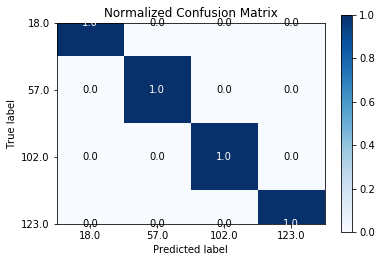

In [23]:
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from pandas import DataFrame
import seaborn as sns

# To apply the Machine learning Algorithms create Classes or Method
class SVM:
    def __init__(self,data,Lables):
        X_train, X_test, y_train, y_test = train_test_split(data, Lables, test_size=0.33, random_state=42)
        self.Model = SVC(kernel ='rbf')
        self.Model.fit(X_train,y_train)
        print("Fitting done SVM ")
        pred = self.Model.predict(X_test)
        accuracy = accuracy_score(pred,y_test)
        print("Accuracy = {0:.3f}%". format(accuracy * 100))
        confus_matrix = confusion_matrix(pred,y_test)
        print("confusion matrix: \n", confus_matrix)
        print("Classification Report: \n",classification_report(y_test,pred))
        plt.figure(figsize=(50,50))
        skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)
        plt.show()


class RandomForest:
    def __init__(self,data,Lables):
        X_train, X_test, y_train, y_test = train_test_split(data, Lables, test_size=0.33, random_state=42)
        self.rf = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
        self.rf.fit(X_train,y_train)
        print("Fitting done Random Forest ")
        pred = self.rf.predict(X_test)
        accuracy = accuracy_score(pred,y_test)
        print("Accuracy = {0:.3f}%". format(accuracy * 100))
        confus_matrix = confusion_matrix(pred,y_test)
        print("confusion matrix: \n", confus_matrix)
        print("Classification Report: \n",classification_report(y_test,pred))
        plt.figure(figsize=(50,50))
        skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)
        plt.show()
        
        
class DecisionTree:
    def __init__(self,data,Lables):
        from sklearn.model_selection import train_test_split
        X_train, X_test, y_train, y_test = train_test_split(data, Lables, test_size=0.33, random_state=42)
        self.clf = DecisionTreeClassifier()
        self.clf.fit(X_train,y_train)
        print("Fitting done Decision Tree ")
        pred = self.clf.predict(X_test)
        accuracy = accuracy_score(pred,y_test)
        print("Accuracy = {0:.3f}%". format(accuracy * 100))
        confus_matrix = confusion_matrix(pred,y_test)
        print("confusion matrix: \n", confus_matrix)
        print("Classification Report: \n",classification_report(y_test,pred))
        plt.figure(figsize=(50,50))
        skplt.metrics.plot_confusion_matrix(y_test, pred, normalize=True)
        plt.show()
        
        
class KNN:
    def __init__(self,data,Lables,LabelsName):
        X_train, X_test, y_train, y_test = train_test_split(data, Lables, test_size=0.33, random_state=42)
        self.knn = KNeighborsClassifier(n_neighbors=3)
        self.knn.fit(X_train,y_train)
        print("Fitting done KNN ")
        pred = self.knn.predict(X_test)
        accuracy = accuracy_score(pred,y_test)
        print("Accuracy = {0:.3f}%". format(accuracy * 100))
        print("Rows classified: " + str(len(pred)))
        confus_matrix = confusion_matrix(pred,y_test)
        print("confusion matrix: \n", confus_matrix )
        print("Classification Report: \n",classification_report(y_test,pred, target_names=LabelsName))
        plt.figure(figsize=(50,50))
        skplt.metrics.plot_confusion_matrix(y_test[0:4], pred[0:4], normalize=True)
        plt.show()
        
        
# print the existing shape of the Data and Labels
print("Training file Structure: ",  Data.shape, Labels.shape)

########### ML algorithms objects ############

# SVM(Data,Labels)

# RandomForest(Data,Labels)

# DecisionTree(Data,Labels)

KNN(Data,Labels,LabelsName)